<a href="https://colab.research.google.com/github/LorenFiorini/Market-Analysis/blob/main/Cryptocurrency_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
! pip install --upgrade pandas
! pip install --upgrade pandas-datareader

In [39]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt


In [40]:
# 2017-04-29
df = web.DataReader('BTC-USD', 'yahoo', start='2020-04-22', end='2022-04-22')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,7145.865723,6867.781738,6879.440430,7117.207520,33249153866,7117.207520
2020-04-23,7491.785156,7081.594727,7121.306152,7429.724609,43500782316,7429.724609
2020-04-24,7574.195801,7434.181641,7434.181641,7550.900879,34636526286,7550.900879
2020-04-25,7641.363770,7521.672363,7550.482910,7569.936035,32941541447,7569.936035
2020-04-26,7700.594238,7561.407715,7570.139160,7679.867188,33070154491,7679.867188
...,...,...,...,...,...,...
2022-04-19,41672.960938,40618.632812,40828.175781,41502.750000,25303206547,41502.750000
2022-04-20,42126.300781,40961.097656,41501.746094,41374.378906,27819532341,41374.378906
2022-04-21,42893.582031,40063.828125,41371.515625,40527.363281,35372786395,40527.363281


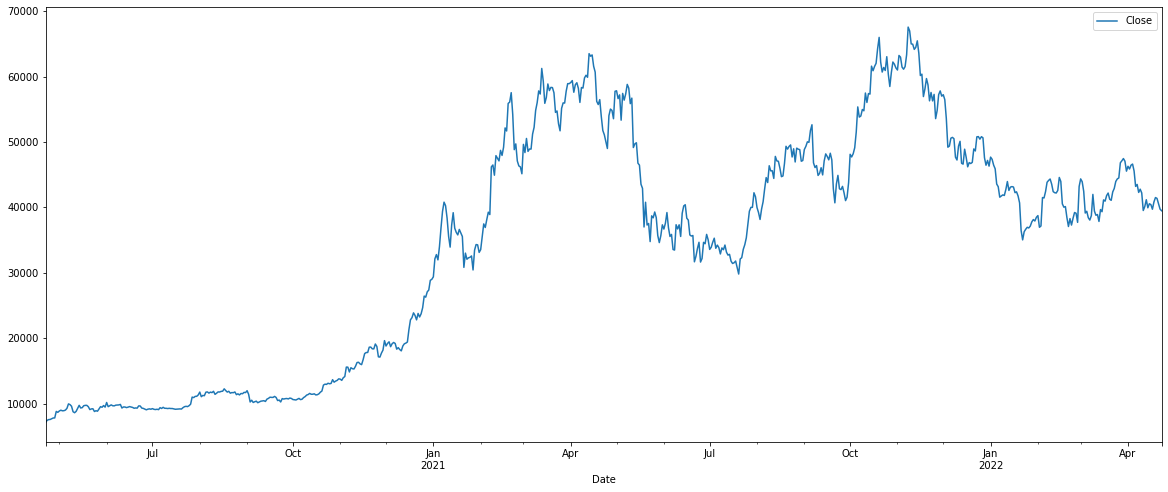

In [41]:
##df['Close'].plot(figsize=(20, 8)) work as well
df.plot(figsize=(20, 8), y = 'Close')

# **Time Series Decomposition**

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose



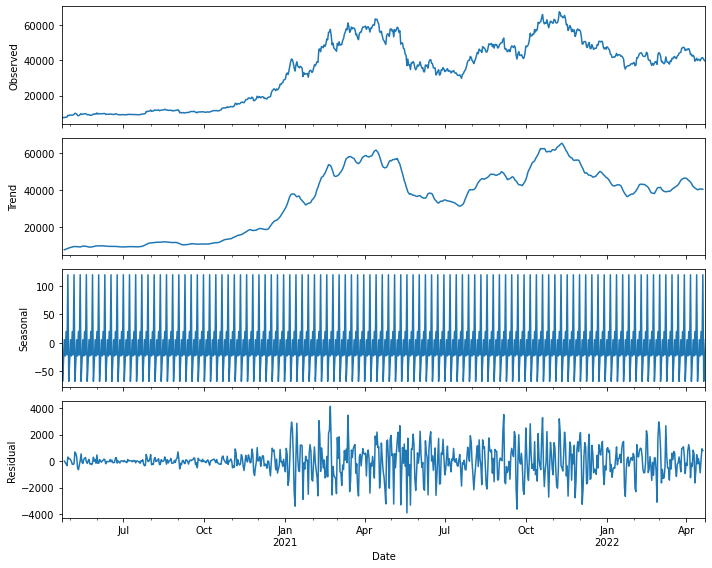

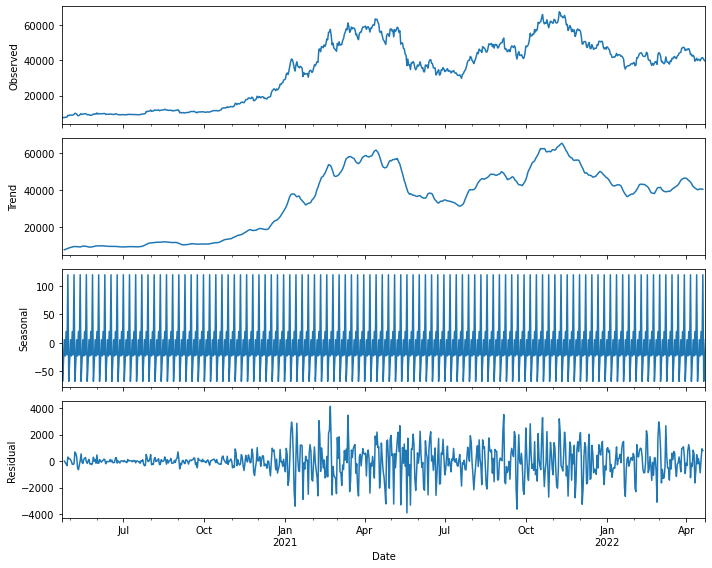

In [43]:
dec = seasonal_decompose(df['Close'], model='additive')
#plt.rcParams['figure.figsize'] = (10, 8)

dec.plot()

In [52]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
! pip install pystan==2.19.1.1
! pip install prophet

In [47]:
from prophet import Prophet


In [63]:
from pandas.core.frame import DataFrame

#df_close = df['Close'].copy()
#df_close.rename(columns={"Date": "ds", "Close": "y"})
data_obj = {'ds' : df.index, 'y' : df['Close']}
df_close = DataFrame(data=data_obj)
df_close


,ds,y
Date,,
2020-04-22,2020-04-22,7117.207520
2020-04-23,2020-04-23,7429.724609
2020-04-24,2020-04-24,7550.900879
2020-04-25,2020-04-25,7569.936035
2020-04-26,2020-04-26,7679.867188
...,...,...
2022-04-19,2022-04-19,41502.750000
2022-04-20,2022-04-20,41374.378906
2022-04-21,2022-04-21,40527.363281


In [65]:
m = Prophet()

m.fit(df_close)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1092,2023-04-19
1093,2023-04-20
1094,2023-04-21
1095,2023-04-22
1096,2023-04-23


In [67]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1092,2023-04-19,-60943.029408,-144242.426930,17361.584018
1093,2023-04-20,-61546.248737,-145334.168974,16261.093585
1094,2023-04-21,-61932.518786,-145898.403569,16264.385366
1095,2023-04-22,-62302.913757,-146715.263940,15287.842057
1096,2023-04-23,-62768.541058,-148617.776537,15716.570674


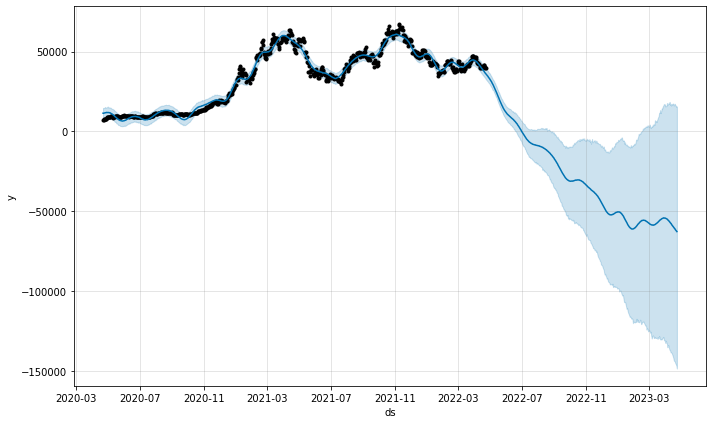

In [68]:
fig1 = m.plot(forecast)


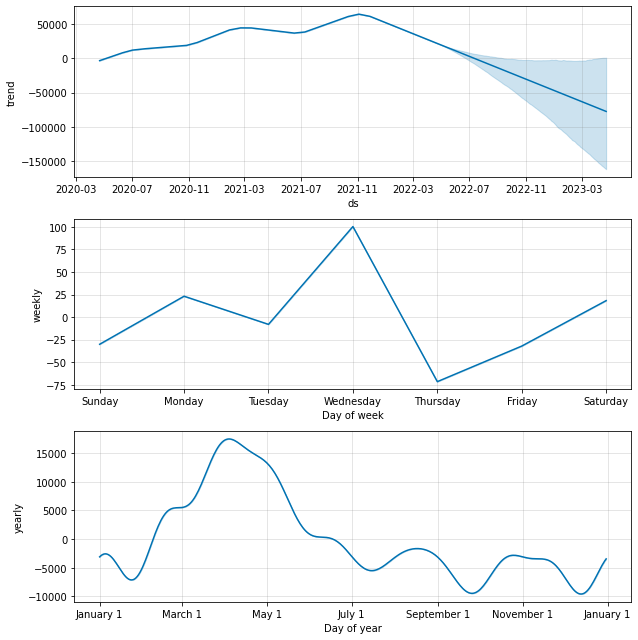

In [69]:
fig2 = m.plot_components(forecast)


In [70]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [71]:
plot_components_plotly(m, forecast)